In [2]:
import pandas as pd
import boto3
!pip install s3fs
import s3fs
flights_df= pd.read_csv("s3://sagemaker-us-east-1-993410942383/content-project/airline_data/airline_flights_table/arline_flights_table.csv")
flights_df.head()

C:\Users\Mohammad\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,...,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime
0,0,2016,1,1,6,3,2016-01-06,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2016,1,1,7,4,2016-01-07,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2016,1,1,8,5,2016-01-08,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2016,1,1,9,6,2016-01-09,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2016,1,1,10,7,2016-01-10,AA,19805,AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:

df_carrier = flights_df.groupby(["UniqueCarrier"]).Cancelled.sum().reset_index()
df_carrier = df_carrier.sort_values('Cancelled')

df_carrier

,UniqueCarrier,Cancelled
6,HA,4
5,F9,77
1,AS,139
10,VX,159
7,NK,308
2,B6,897
3,DL,974
8,OO,984
9,UA,1336
4,EV,1427


In [7]:
flights_df.columns

Index(['Unnamed: 0', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'FlightDate', 'UniqueCarrier', 'AirlineID', 'Carrier', 'TailNum',
       'FlightNum', 'OriginAirportID', 'OriginAirportSeqID',
       'OriginCityMarketID', 'Origin', 'OriginCityName', 'OriginState',
       'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID',
       'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'CRSDepTime',
       'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff',
       'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime',
       'ActualElapsedTime', 'AirTime', 'Flights', 'Distance', 'DistanceGroup',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
      

which airline had the most cancelled flights in 2016

Text(0.5, 1.0, 'Cancellations per Carriers')

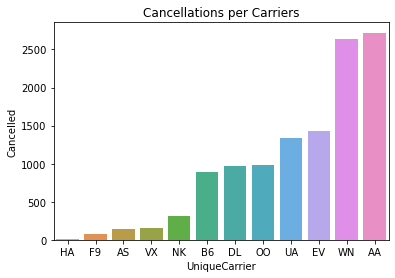

In [73]:
import matplotlib.pyplot as plt
import os
import seaborn as sns




g_bar=sns.barplot(x="UniqueCarrier", y="Cancelled", data=df_carrier)
g_bar.set_title("Cancellations per Carriers")

Which days of month have the most delays?

In [74]:
df_dayofmonth = flights_df.groupby(["DayofMonth"]).Cancelled.sum().reset_index()

df_dayofmonth

,DayofMonth,Cancelled
0,1,57
1,2,52
2,3,97
3,4,87
4,5,204
5,6,235
6,7,173
7,8,187
8,9,145
9,10,167


Text(0.5, 1.0, 'Cancellations per Day of Month')

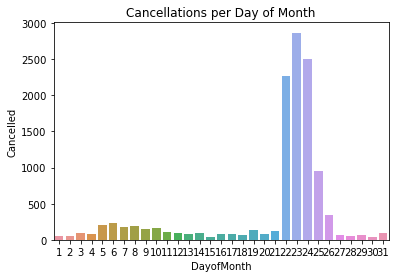

In [75]:

g_bar=sns.barplot(x="DayofMonth", y="Cancelled", data=df_dayofmonth)
g_bar.set_title("Cancellations per Day of Month")

Which day of week has the most cancelled flights

In [76]:
df_DayOfWeek = flights_df.groupby(["DayOfWeek"]).Cancelled.sum().reset_index()
df_DayOfWeek

,DayOfWeek,Cancelled
0,1,1228
1,2,782
2,3,469
3,4,449
4,5,2615
5,6,3183
6,7,2939


Text(0.5, 1.0, 'Cancellations per Day Of Week')

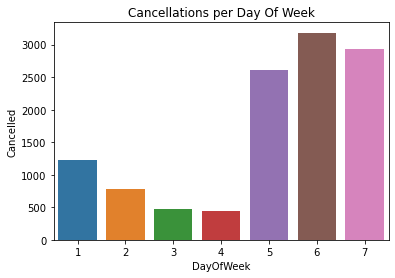

In [77]:
g_bar=sns.barplot(x="DayOfWeek", y="Cancelled", data=df_DayOfWeek)
g_bar.set_title("Cancellations per Day Of Week")

In [8]:
weather_df= pd.read_csv("s3://sagemaker-us-east-1-993410942383/content-project/airline_data/WeatherUS_2016/WeatherUS_2016.csv")
weather_df.head()

,Unnamed: 0,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0


In [66]:
weather_df['StartTime(UTC)'] = pd.to_datetime(weather_df['StartTime(UTC)'])
weather_df['EndTime(UTC)'] = pd.to_datetime(weather_df['EndTime(UTC)'])
weather_df= weather_df.rename(columns={'Precipitation(in)': 'Precipitation_in'})

In [67]:
weather_df

,Unnamed: 0,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation_in,TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,0,W-1,Snow,Light,2016-01-06 23:14:00,2016-01-07 00:34:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,1,W-2,Snow,Light,2016-01-07 04:14:00,2016-01-07 04:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,2,W-3,Snow,Light,2016-01-07 05:54:00,2016-01-07 15:34:00,0.03,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,3,W-4,Snow,Light,2016-01-08 05:34:00,2016-01-08 05:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,4,W-5,Snow,Light,2016-01-08 13:54:00,2016-01-08 15:54:00,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185986,7476860,W-7574893,Snow,Light,2016-12-25 18:00:00,2016-12-25 18:30:00,0.01,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0
1185987,7476861,W-7574894,Snow,Moderate,2016-12-25 18:30:00,2016-12-25 20:16:00,0.12,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0
1185988,7476862,W-7574895,Snow,Light,2016-12-25 20:16:00,2016-12-26 00:53:00,0.16,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0
1185989,7476863,W-7574896,Snow,Light,2016-12-31 07:53:00,2016-12-31 08:22:00,0.00,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0


total precipitation for each city and state

In [78]:
weather_City=weather_df.groupby(["City"]).Precipitation_in.sum().reset_index()
weather_City

,City,Precipitation_in
0,Abbeville,86.53
1,Aberdeen,163.58
2,Aberdeen Proving Ground,3.53
3,Abilene,80.62
4,Abingdon,75.54
...,...,...
1711,Yuma,2.92
1712,Zanesville,71.44
1713,Zapata,39.29
1714,Zephyrhills,52.86


In [79]:
weather_state=weather_df.groupby(["State"]).Precipitation_in.sum().reset_index()
weather_state

,State,Precipitation_in
0,AL,3115.76
1,AR,9124.29
2,AZ,1118.57
3,CA,2821.14
4,CO,1003.03
5,CT,559.75
6,DE,247.00
7,FL,8750.89
8,GA,1803.96
9,IA,2887.96


Text(0, 0.5, 'Total Precipitation')

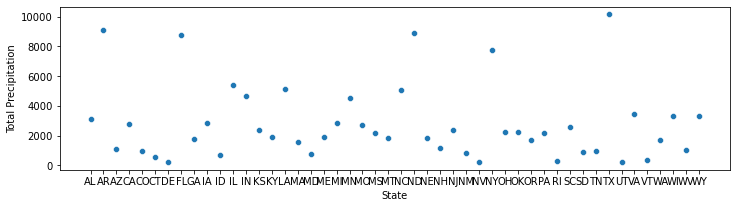

In [81]:
plt.figure(figsize=(12,3))
sns.scatterplot(data=weather_state,x='State',y='Precipitation_in')
plt.xlabel('State')
plt.ylabel('Total Precipitation')


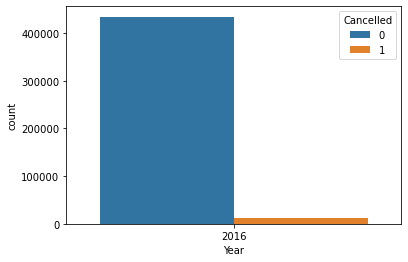

In [19]:
import matplotlib.pyplot as plt

sns.countplot(data=flights_df, x="Year", hue="Cancelled")
plt.show()

In [20]:
df_grouped_by = flights_df.groupby(["Year","Cancelled"])["Year","Cancelled"]
df_balanced = df_grouped_by.apply(lambda x: x.sample(df_grouped_by.size().min()).reset_index(drop=True))
df_balanced.shape

C:\Users\Mohammad\AppData\Local\Temp/ipykernel_28140/4041968899.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_grouped_by = flights_df.groupby(["Year","Cancelled"])["Year","Cancelled"]


(23330, 2)

<AxesSubplot:xlabel='Cancelled', ylabel='count'>

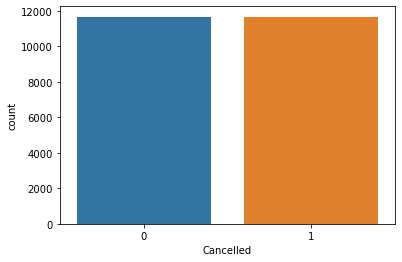

In [21]:
import seaborn as sns
sns.countplot(data=df_balanced, x="Cancelled")